### **CIFAR10 Dataset**

* 작성자: 나동빈(Dongbin Na)
* CNN을 이용해 CIFAR10 데이터셋에 대하여 학습/평가를 진행합니다.
* 코드 실행 전에 **[런타임]** → **[런타임 유형 변경]** → 유형을 **GPU**로 설정해야 합니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 필요한 라이브러리 불러오기

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

from matplotlib import pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import os
import torchvision.models as models

device = 'cuda'

#### 데이터셋(Dataset) 다운로드 및 불러오기 / DenseNet121 학습

In [3]:
import torchvision
import torchvision.transforms as transforms
import os
from torch.utils.data import random_split

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

# Define the root path to the train and test folders
root_folder = '/content/drive/MyDrive/korea_influencer/'

# Define subfolder paths
train_folder = os.path.join(root_folder, 'train')
test_folder = os.path.join(root_folder, 'test')

transform_train = transforms.Compose([

    transforms.RandomResizedCrop(size=(256, 256), scale=(0.5, 1.0), ratio=(3 / 4, 4 / 3)),
    transforms.Resize((256, 256)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

transform_val = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

transform_test = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5]
    )
])

# Create custom datasets using the ImageFolder dataset class
train_dataset = torchvision.datasets.ImageFolder(root=train_folder, transform=transform_train)
test_dataset = torchvision.datasets.ImageFolder(root=test_folder, transform=transform_test)

# Load only 5 pieces of data for each class
# num_samples_per_class = 100
# subset_indices_train = []
# for class_idx_train in range(len(train_dataset.classes)):
#     class_indices_train = [idx for idx, label in enumerate(train_dataset.targets) if label == class_idx_train]
#     subset_indices_train.extend(class_indices_train[:num_samples_per_class])

# subset_indices_test = []
# for class_idx_test in range(len(test_dataset.classes)):
#     class_indices_test = [idx for idx, label in enumerate(test_dataset.targets) if label == class_idx_test]
#     subset_indices_test.extend(class_indices_test[:num_samples_per_class])

# Create a subset dataset with only 5 samples per class
# train_dataset_subset = torch.utils.data.Subset(train_dataset, subset_indices_train)
# test_dataset_subset = torch.utils.data.Subset(test_dataset, subset_indices_test)

#train / val 9:1
dataset_size = len(train_dataset)
train_size = int(dataset_size * 0.9)
val_size = dataset_size - train_size

train_dataset_jin, val_dataset_jin = random_split(train_dataset, [train_size, val_size])

# Set batch sizes and create data loaders
batch_size_train = 10
batch_size_val = 10
batch_size_test = 10


train_loader = torch.utils.data.DataLoader(train_dataset_jin, batch_size=batch_size_train, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset_jin, batch_size=batch_size_val, shuffle=False, num_workers = 4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False, num_workers=4)

# 데이터 시각화

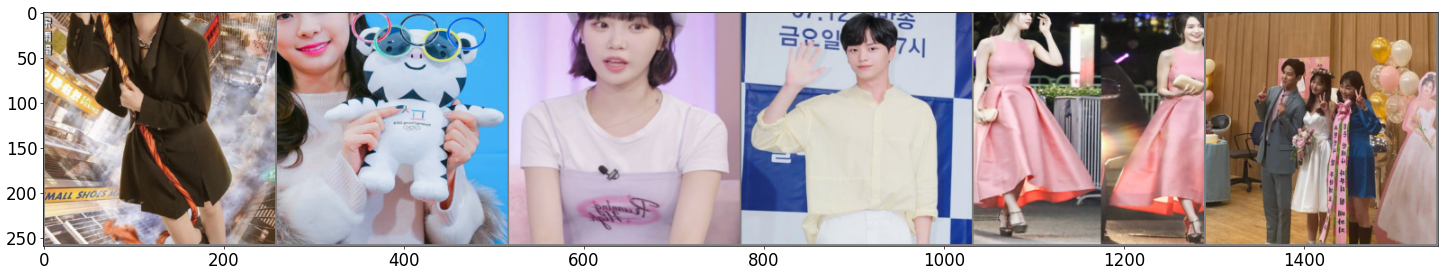

['idle_yuqi', 'kimyouna', 'lesse_kimchaewon', 'btob_yooksungjae', 'gg_yuna', 'paulkim']


In [4]:
plt.rcParams['figure.figsize'] = [30, 8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})


def imshow(input):
    # torch.Tensor => numpy
    input = input.numpy().transpose((1, 2, 0))
    # undo image normalization
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # display images
    plt.imshow(input)
    plt.show()


class_names = {
  0: "IU",
  1: "kimyouna",
  2: "ive_JWY",
  3: "bts_jimin",
  4: "kangdaniel",
  5: "bts_V",
  6: "astro_CEW",
  7: "rv_irene",
  8: "aespa_karina",
  9: "stkiz_hyunjin",
  10: "njs_haerin",
  11: "bp_jisoo",
  12: "ive_ahnyoojin",
  13: "rv_joy",
  14: "lesse_sakura",
  15: "bts_jungkook",
  16: "bp_jennie",
  17: "shinee_minho",
  18: "idle_minnie",
  19: "idle_yuqi",
  20: "idel_miyeon",
  21: "gg_taeyoun",
  22: "gg_yuna",
  23: "shinee_key",
  24: "shinee_taemin",
  25: "btob_yooksungjae",
  26: "kimsoohyun",
  27: "hyunbin",
  28: "10cm",
  29: "ive_gaeul",
  30: "kimtaeri",
  31: "leedongyook",
  32: "lesse_kimchaewon",
  33: "namjuhyuk",
  34: "nct_mark",
  35: "gongyoo",
  36: "kangdongwon",
  37: "lesse_kazuha",
  38: "songjungki",
  39: "aespa_winter",
  40: "twice_tzuwi",
  41: "idle_shuhwa",
  42: "parkhaejin",
  43: "paulkim",
  44: "ahnbohyun",
  45: "aespa_ningning",
  46: "itzy_yezi",
  47: "newist_minhyun",
  48: "ahnhyosub",
  49: "bp_rose"
}

# load a batch of train image
iterator = iter(train_loader)

# visualize a batch of train image
imgs, labels = next(iterator)
out = torchvision.utils.make_grid(imgs[:6])
imshow(out)
print([class_names[labels[i].item()] for i in range(6)])

#### 학습(Training) 및 평가(Testing) 함수 정의

In [5]:
learning_rate = 0.002
log_step = 20
n_classes = 50

model = models.efficientnet_b0(pretrained=True)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, n_classes) # transfer learning
model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
import time


def train():
    start_time = time.time()
    print(f'[Epoch: {epoch + 1} - Training]')
    model.train()
    total = 0
    running_loss = 0.0
    running_corrects = 0

    for i, batch in enumerate(train_loader):
        imgs, labels = batch
        imgs, labels = imgs.cuda(), labels.cuda()

        outputs = model(imgs)
        optimizer.zero_grad()
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        total += labels.shape[0]
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

        if i % log_step == log_step - 1:
            print(f'[Batch: {i + 1}] running train loss: {running_loss / total}, running train accuracy: {running_corrects / total}')

    print(f'train loss: {running_loss / total}, accuracy: {running_corrects / total}')
    print("elapsed time:", time.time() - start_time)
    return running_loss / total, (running_corrects / total).item()


def validate():
    start_time = time.time()
    print(f'[Epoch: {epoch + 1} - Validation]')
    model.eval()
    total = 0
    running_loss = 0.0
    running_corrects = 0

    for i, batch in enumerate(val_loader):
        imgs, labels = batch
        imgs, labels = imgs.cuda(), labels.cuda()

        with torch.no_grad():
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        total += labels.shape[0]
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

        if (i == 0) or (i % log_step == log_step - 1):
            print(f'[Batch: {i + 1}] running val loss: {running_loss / total}, running val accuracy: {running_corrects / total}')

    print(f'val loss: {running_loss / total}, accuracy: {running_corrects / total}')
    print("elapsed time:", time.time() - start_time)
    return running_loss / total, (running_corrects / total).item()


def test():
    start_time = time.time()
    print(f'[Test]')
    model.eval()
    total = 0
    running_loss = 0.0
    running_corrects = 0

    for i, batch in enumerate(test_loader):
        imgs, labels = batch
        imgs, labels = imgs.cuda(), labels.cuda()

        with torch.no_grad():
            outputs = model(imgs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        total += labels.shape[0]
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)

        if (i == 0) or (i % log_step == log_step - 1):
            print(f'[Batch: {i + 1}] running test loss: {running_loss / total}, running test accuracy: {running_corrects / total}')

    print(f'test loss: {running_loss / total}, accuracy: {running_corrects / total}')
    print("elapsed time:", time.time() - start_time)
    return running_loss / total, (running_corrects / total).item()

In [7]:
import time

def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate
    if epoch >= 5:
        lr /= 10
    if epoch >= 10:
        lr /= 10
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


num_epochs = 25
best_val_acc = 0
best_epoch = 0

history = []
accuracy = []
for epoch in range(num_epochs):
    adjust_learning_rate(optimizer, epoch)
    train_loss, train_acc = train()
    val_loss, val_acc = validate()
    history.append((train_loss, val_loss))
    accuracy.append((train_acc, val_acc))

    if val_acc > best_val_acc:
        print("[Info] best validation accuracy!")
        best_val_acc = val_acc
        best_epoch = epoch
        torch.save(model.state_dict(), f'best_checkpoint_epoch_{epoch + 1}.pth')

torch.save(model.state_dict(), f'EfficientNet_B0_best_epoch.pth')

[Epoch: 1 - Training]
[Batch: 20] running train loss: 0.4048394799232483, running train accuracy: 0.029999999329447746
[Batch: 40] running train loss: 0.4062910717725754, running train accuracy: 0.029999999329447746
[Batch: 60] running train loss: 0.404898434082667, running train accuracy: 0.02666666731238365
[Batch: 80] running train loss: 0.4008532601594925, running train accuracy: 0.032499998807907104
[Batch: 100] running train loss: 0.3974481735229492, running train accuracy: 0.036000002175569534
[Batch: 120] running train loss: 0.3932271174589793, running train accuracy: 0.04083333536982536
[Batch: 140] running train loss: 0.3895287917341505, running train accuracy: 0.044999998062849045
[Batch: 160] running train loss: 0.38590080335736276, running train accuracy: 0.048124998807907104
[Batch: 180] running train loss: 0.38268985668818156, running train accuracy: 0.05111111328005791
[Batch: 200] running train loss: 0.37782193768024447, running train accuracy: 0.061500001698732376
[Ba

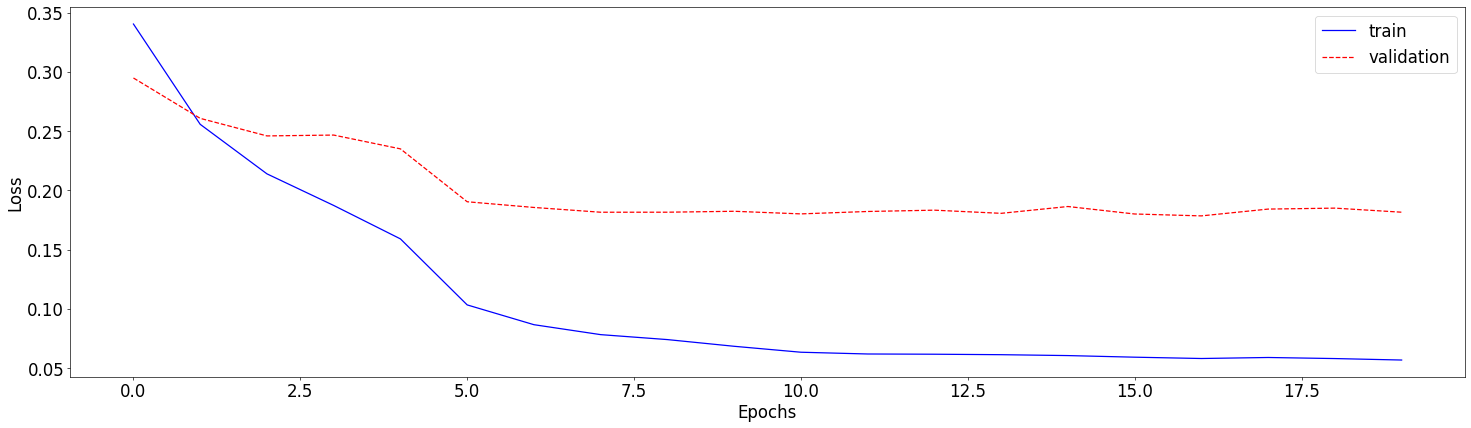

In [8]:
plt.plot([x[0] for x in history], 'b', label='train')
plt.plot([x[1] for x in history], 'r--',label='validation')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

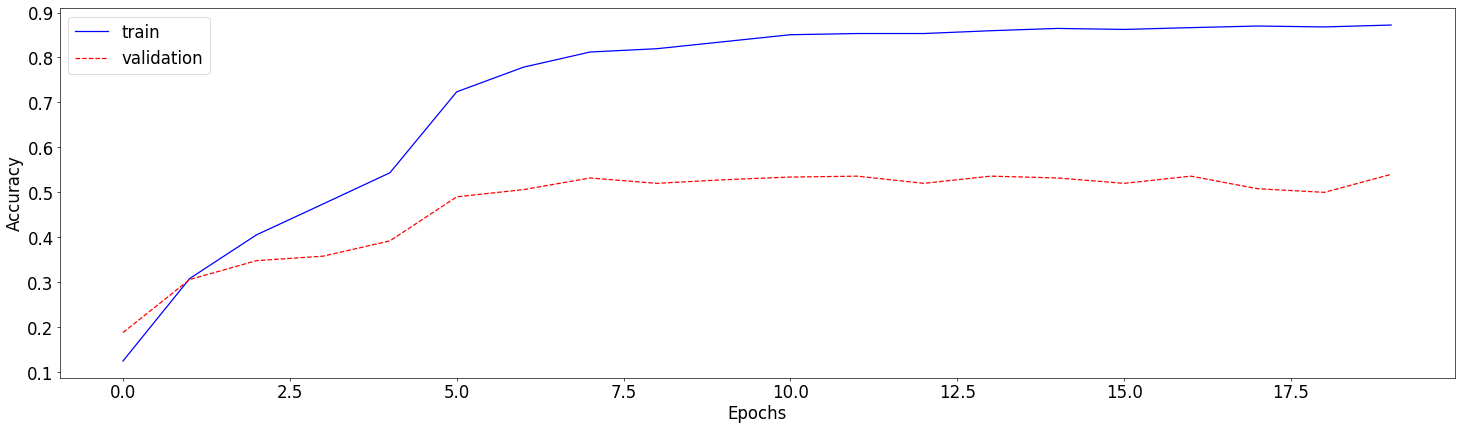

In [9]:
plt.plot([x[0] for x in accuracy], 'b', label='train')
plt.plot([x[1] for x in accuracy], 'r--',label='validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [10]:
model = models.efficientnet_b0(pretrained=True)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, n_classes) # transfer learning
model = model.cuda()
model_path = 'EfficientNet_B0_best_epoch.pth'
model.load_state_dict(torch.load(model_path))

test_loss, test_accuracy = test()
print(f"Test loss: {test_loss:.8f}")
print(f"Test accuracy: {test_accuracy * 100.:.2f}%")

[Test]
[Batch: 1] running test loss: 0.5181520938873291, running test accuracy: 0.0
[Batch: 20] running test loss: 0.33624668180942535, running test accuracy: 0.23999999463558197
[Batch: 40] running test loss: 0.4044934931397438, running test accuracy: 0.16249999403953552
[Batch: 60] running test loss: 0.3788964209953944, running test accuracy: 0.1783333420753479
[Batch: 80] running test loss: 0.3741374734044075, running test accuracy: 0.1899999976158142
[Batch: 100] running test loss: 0.3677445336580277, running test accuracy: 0.1980000138282776
[Batch: 120] running test loss: 0.3513089226682981, running test accuracy: 0.2150000035762787
[Batch: 140] running test loss: 0.33081260387386596, running test accuracy: 0.24571427702903748
[Batch: 160] running test loss: 0.3179192902892828, running test accuracy: 0.25999999046325684
[Batch: 180] running test loss: 0.3187558242347505, running test accuracy: 0.2600000202655792
[Batch: 200] running test loss: 0.32534530133008954, running test ac

In [ ]:
model = models.efficientnet_b0(pretrained=True)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, n_classes) # Transfer learning
model = model.cuda()
model_path = 'EfficientNet_B0_best_epoch.pth'
model.load_state_dict(torch.load(model_path))

# Define the test function to calculate top-5 accuracy
def test_top3():
    model.eval()
    top5_correct = 0
    total_samples = 0

    with torch.no_grad():
        for data in test_loader:  # Assuming you have a test_loader for your dataset
            inputs, labels = data
            inputs, labels = inputs.cuda(), labels.cuda()

            outputs = model(inputs)
            _, predictions = outputs.topk(3, 1)  # Get the top-5 predictions

            total_samples += labels.size(0)
            top3_correct += torch.sum(predictions.eq(labels.view(-1, 1)))

    top3_accuracy = top5_correct / total_samples
    return top3_accuracy

# Call the test_top5 function to get the top-5 accuracy
top3_accuracy = test_top3()

# Print the top-5 accuracy
print(f"Top-3 accuracy: {top3_accuracy * 100:.2f}%")